# Teeth Whitening 

In [2]:
import cv2
import sys
from matplotlib import pyplot as plt 
import numpy as np 

Adds Haar's Cascade for Face Detections 

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.load('haarcascade_frontalface_default.xml') == False:
    print("Please put .xml files in the same directory")
else: 
    print("Whoo Please Continue")

Whoo Please Continue


Open Camera 

In [277]:
cap = cv2.VideoCapture(0)

In [280]:
ret, img = cap.read()  
  

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
for (x,y,w,h) in faces:  
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 

img = roi_color[:,:,::-1]#slice the face 
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]
 
bg = cv2.add(b, g)
rg = cv2.add(r,g)


In [300]:
mask = (r > 170) & (g > 170)& (b > 0) #Since yellow is rgb(255,255,0)
mask = mask.astype(np.uint8)*255


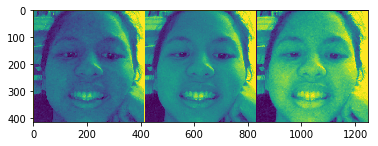

In [301]:
#img = img[:,:,::-1] #BGR => RGB OTHERWISE ITS GONNA BE BLUE 
channels = np.hstack((r,g,b))
plt.imshow(channels) 

Close Camera and De-allocate any associated memory usage 

In [302]:
cap.release() 
cv2.destroyAllWindows()  

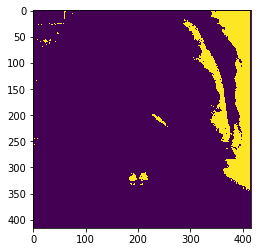

In [303]:
plt.imshow(mask) 

In [392]:
mean  = rg/200
mask = mask.astype(np.bool)[:, :, np.newaxis]
mean = mean[:,: , np.newaxis]
imgOut = img.copy()

In [393]:
np.copyto(imgOut, mean, where=mask, casting="unsafe")

ValueError: could not broadcast where mask from shape (416,416,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1) into shape (416,416,3)

In [387]:
np.add(imgOut, mean, out=imgOut, casting="unsafe")

array([[[173, 172, 172],
        [173, 172, 172],
        [173, 172, 172],
        ...,
        [173, 172, 172],
        [173, 172, 172],
        [173, 172, 172]],

       [[173, 172, 172],
        [173, 172, 172],
        [173, 172, 172],
        ...,
        [173, 172, 172],
        [173, 172, 172],
        [173, 172, 172]],

       [[173, 172, 172],
        [173, 172, 172],
        [ 70,  62,  34],
        ...,
        [172, 172, 172],
        [172, 172, 172],
        [173, 172, 172]],

       ...,

       [[173, 172, 172],
        [173, 172, 172],
        [ 15,   9,  17],
        ...,
        [255, 207, 188],
        [103,  62,  40],
        [173, 172, 172]],

       [[173, 172, 172],
        [173, 172, 172],
        [ 94,  91,  96],
        ...,
        [ 92,  46,  27],
        [237, 193, 173],
        [173, 172, 172]],

       [[173, 172, 172],
        [173, 172, 172],
        [173, 172, 172],
        ...,
        [173, 172, 172],
        [173, 172, 172],
        [173, 172, 172]]

In [382]:
numpy_horizontal = np.hstack((img, imgOut))

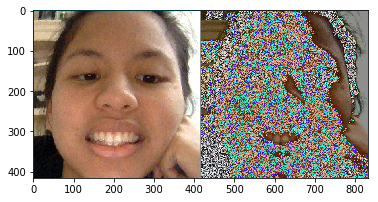

In [383]:
plt.imshow(numpy_horizontal) 

In [341]:
imgOut.shape
#imgOut.dtype #fixed with casting unsafe 

(416, 416, 3)

In [342]:
mean.shape
#mean.dtype

(416, 416)

In [346]:
mean.ravel()

array([127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5])

In [347]:
mean.shape

(416, 416)

In [349]:
mask3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 

TypeError: Expected cv::UMat for argument 'src'